In [1]:
!pip install sklearn

You should consider upgrading via the '/home/sarah/hrv_analysis/bin/python -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import seaborn as sb
import os
import csv
import statistic as stat
#import matplotlib as plt
import matplotlib.pyplot as plt
import itertools
import numpy as np
import dataframe_image as dfi


In [2]:
#Einlesen des Gesamtdatensatz und Austausch der Parameter durch numerische Werte
dataset = stat.make_df_with_all_results('hrvresults')
dataset = dataset.replace(['Wach', 'Rem', 'N1', 'N2', 'N3'],[1,2,3,4,5],regex=True)
dataset = dataset.replace(['NT1','NT2','IHS'],[1,2,3],regex=True)
dataset

,stadium,dia,idp,ECG_Rate_Mean,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,...,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn,HRV_MSE,HRV_CMSE,HRV_RCMSE,HRV_DFA,HRV_CorrDim
0,1,2,1,81.458722,15.876781,736.593364,48.499974,15.896172,0.065844,0.021554,...,0.525396,33.447002,35.191242,0.815232,0.818601,0.713858,1.131723,2.026869,1.279389,1.076297
3,4,2,1,66.312176,25.086265,904.912405,30.468709,25.124339,0.033670,0.027722,...,0.478968,22.005162,21.098205,1.122557,1.883875,1.269301,1.605163,1.813068,1.093870,1.573185
4,5,2,1,65.562835,23.118827,915.260736,24.086882,23.154364,0.026317,0.025259,...,0.516818,16.743622,17.316625,1.222668,1.724010,1.239263,1.516022,1.657137,1.019897,1.562845
6,5,2,1,65.987759,21.948768,909.322599,20.601031,21.982081,0.022655,0.024137,...,0.506045,14.479863,14.656010,1.349880,1.839793,1.206336,1.504657,1.583736,1.043609,1.706261
7,5,2,1,65.829481,21.940263,911.513910,21.927900,21.973875,0.024057,0.024070,...,0.463855,16.079761,14.956489,1.341022,1.862377,1.113512,1.592714,1.663056,1.028978,1.596795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,4,3,8,54.545092,34.033978,1100.121079,49.941360,34.097068,0.045396,0.030937,...,0.483154,35.950257,34.758745,1.131870,1.825711,0.865281,1.331795,1.839454,1.165937,1.463973
49,4,3,8,54.537051,34.689495,1100.284352,57.361779,34.753627,0.052134,0.031528,...,0.545023,38.748582,42.410032,1.048227,1.729820,0.864630,1.648423,1.627398,1.115473,1.334979
50,4,3,8,53.737328,36.830468,1116.748596,78.781833,36.899821,0.070546,0.032980,...,0.533095,53.899455,57.593334,1.053732,1.233670,0.632527,1.378039,1.495296,1.357615,1.075887
52,1,3,8,55.142885,42.230722,1088.304060,74.675383,42.305473,0.068616,0.038804,...,0.512008,52.171220,53.439567,1.044543,1.345225,0.639270,1.094776,1.180818,1.032052,0.990642


In [3]:
#Gewinnung von statistischen Werten des Gesamtdatensatzes
analyse = dataset.describe()
analyse = analyse.transpose()
analyse.round(0)
#dfi.export(greatest_corr_p,"statistics/greatest_pearson_correlations.png")

,count,mean,std,min,25%,50%,75%,max
stadium,900.0,3.0,1.0,1.0,2.0,4.0,4.0,5.0
dia,900.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0
idp,900.0,4.0,2.0,1.0,2.0,3.0,7.0,8.0
ECG_Rate_Mean,900.0,62.0,10.0,45.0,54.0,58.0,69.0,95.0
HRV_RMSSD,900.0,70.0,47.0,8.0,32.0,56.0,99.0,292.0
...,...,...,...,...,...,...,...,...
HRV_MSE,900.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0
HRV_CMSE,900.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0
HRV_RCMSE,900.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0
HRV_DFA,900.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0


In [4]:
#Erstellung verschiedener Datensätze nach Stadium und Diagnose

#    def make_different_df(stadium_name, dataset):
#
#        stadium = dataset.loc[dataset['stadium'] == stadium_name]
#        stadium.reset_index(inplace=True, drop=True)
#
#        stadium_dia_one = stadium.loc[stadium['dia'] == 1]
#        stadium_dia_two = stadium.loc[stadium['dia'] == 2]
#        stadium_dia_three = stadium.loc[stadium['dia'] == 3]

#        return stadium, stadium_dia_one, stadium_dia_two, stadium_dia_three 

wach, wach_nt1, wach_nt2, wach_ihs = stat.make_different_df(1, dataset)
rem, rem_nt1, rem_nt2, rem_ihs = stat.make_different_df(2, dataset)
n1, n1_nt1, n1_nt2, n1_ihs = stat.make_different_df(3, dataset)
n2, n2_nt1, n2_nt2, n2_ihs = stat.make_different_df(4, dataset)
n3, n3_nt1, n3_nt2, n3_ihs = stat.make_different_df(5, dataset)

all_stats = [wach_nt1, wach_nt2, wach_ihs, rem_nt1, rem_nt2, rem_ihs, n1_nt1, 
             n1_nt2, n1_ihs, n2_nt1, n2_nt2, n2_ihs, n3_nt1, n3_nt2, n3_ihs]
name_stats = ['wach_nt1', 'wach_nt2', 'wach_ihs', 'rem_nt1', 'rem_nt2', 'rem_ihs', 'n1_nt1', 
             'n1_nt2', 'n1_ihs', 'n2_nt1', 'n2_nt2', 'n2_ihs', 'n3_nt1', 'n3_nt2', 'n3_ihs']

for i,stats in enumerate(all_stats):
    stats = stats.describe()
    stats = stats.transpose()
    dfi.export(stats,"statistics/"+name_stats[i]+".png")


#dfi.export(wach_nt1_stats,"statistics/wach_nt1_stats.png")


In [5]:
#Aufteilung der Daten in mehrere Datanesätze zur Darstellung in der Korrelationsmatrix
core_data = dataset[['stadium', 'dia', 'idp', 'ECG_Rate_Mean', 'HRV_RMSSD', 'HRV_MeanNN',
       'HRV_SDNN', 'HRV_SDSD', 'HRV_CVNN', 'HRV_CVSD', 'HRV_MedianNN',
       'HRV_pNN50', 'HRV_pNN20', 'HRV_TINN', 'HRV_HTI',
       'HRV_LF', 'HRV_HF', 'HRV_VHF', 'HRV_LFHF', 'HRV_LFn', 'HRV_HFn',
       'HRV_LnHF', 'HRV_SD1', 'HRV_SD2', 'HRV_SD1SD2']].copy()

second_data = dataset[['HRV_S', 'HRV_CSI','HRV_C1a', 'HRV_SD1d', 'HRV_SD1a', 'HRV_SD2d', 'HRV_SD2a', 'HRV_Cd',
       'HRV_Ca', 'HRV_SDNNd', 'HRV_SDNNa', 'HRV_CMSE', 'HRV_RCMSE', 'HRV_DFA',
       'HRV_CorrDim']].copy()

last_data = dataset[['HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN', 'HRV_CVI',
       'HRV_CSI_Modified', 'HRV_PIP', 'HRV_IALS', 'HRV_PSS', 'HRV_PAS',
       'HRV_GI', 'HRV_SI', 'HRV_AI', 'HRV_PI', 'HRV_C1d', 'HRV_C2d', 'HRV_C2a','HRV_ApEn', 'HRV_MSE']].copy()

In [6]:
correlation_core_p = core_data.corr(method='pearson')
correlation_core_s = core_data.corr(method='spearman')
correlation_core_k = core_data.corr(method='kendall')
correlation_core_p

,stadium,dia,idp,ECG_Rate_Mean,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,...,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD1SD2
stadium,1.000000,0.137171,0.123186,-0.504596,0.266546,0.503012,-0.071243,0.266700,-0.223281,0.197302,...,0.067649,0.494475,-0.002188,-0.472439,-0.586308,0.608308,0.580472,0.266700,-0.200394,0.624227
dia,0.137171,1.000000,0.668474,-0.492288,-0.022450,0.508714,-0.023760,-0.022237,-0.150910,-0.093022,...,-0.024010,0.006864,-0.041550,0.025660,0.013478,-0.008134,-0.022163,-0.022237,-0.021341,0.076470
idp,0.123186,0.668474,1.000000,-0.532170,0.305233,0.567573,0.322647,0.305352,0.188403,0.245458,...,0.168331,0.114313,0.065176,0.040229,0.048249,-0.048098,0.058799,0.305352,0.297244,0.122864
ECG_Rate_Mean,-0.504596,-0.492288,-0.532170,1.000000,-0.494256,-0.989395,-0.345447,-0.494513,-0.092822,-0.380761,...,-0.025662,-0.334603,0.014281,0.387909,0.389627,-0.408121,-0.394446,-0.494513,-0.254775,-0.517130
HRV_RMSSD,0.266546,-0.022450,0.305233,-0.494256,1.000000,0.482385,0.804629,1.000000,0.691757,0.986209,...,0.083880,0.624283,0.389567,-0.475883,-0.577526,0.565115,0.548083,1.000000,0.635912,0.686760
HRV_MeanNN,0.503012,0.508714,0.567573,-0.989395,0.482385,1.000000,0.334251,0.482653,0.077901,0.362748,...,0.036118,0.316355,-0.023282,-0.343115,-0.357327,0.375760,0.371640,0.482653,0.243636,0.500063
HRV_SDNN,-0.071243,-0.023760,0.322647,-0.345447,0.804629,0.334251,1.000000,0.804586,0.957073,0.817161,...,-0.028832,0.207582,0.239226,-0.142048,-0.153377,0.137242,0.073343,0.804586,0.968646,0.199868
HRV_SDSD,0.266700,-0.022237,0.305352,-0.494513,1.000000,0.482653,0.804586,1.000000,0.691632,0.986152,...,0.083843,0.624301,0.389450,-0.475943,-0.577603,0.565200,0.548143,1.000000,0.635859,0.686866
HRV_CVNN,-0.223281,-0.150910,0.188403,-0.092822,0.691757,0.077901,0.957073,0.691632,1.000000,0.745940,...,-0.055443,0.109468,0.253356,-0.037504,-0.043151,0.020820,-0.056943,0.691632,0.956889,0.054803
HRV_CVSD,0.197302,-0.093022,0.245458,-0.380761,0.986209,0.362748,0.817161,0.986152,0.745940,1.000000,...,0.093508,0.611789,0.444341,-0.455763,-0.550276,0.532494,0.520991,0.986152,0.658273,0.642491


In [12]:
#print(correlation.loc['stadium', 'HRV_HFD'])

<AxesSubplot:>

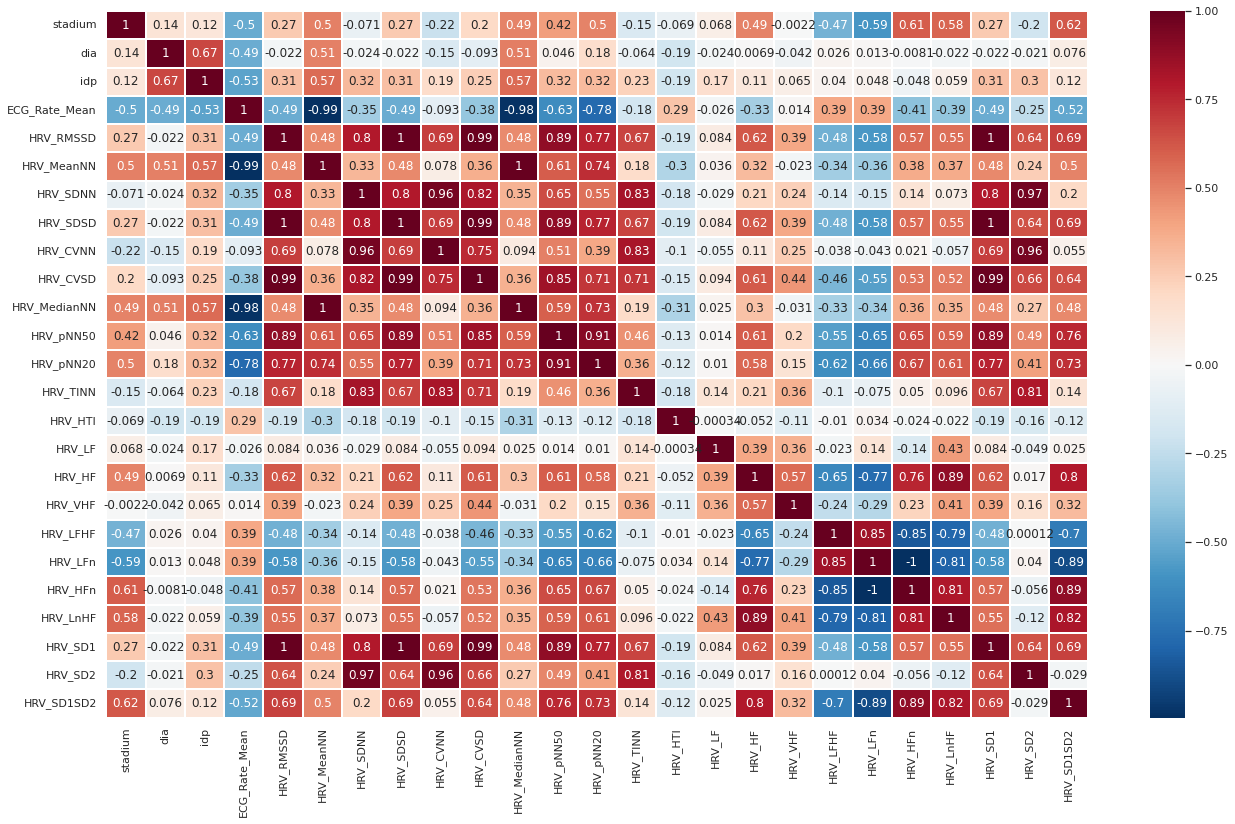

In [13]:
sb.set(rc = {'figure.figsize':(22,13)})
sb.heatmap(correlation_core_p, 
            xticklabels=correlation_core_p.columns,
            yticklabels=correlation_core_p.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=1)

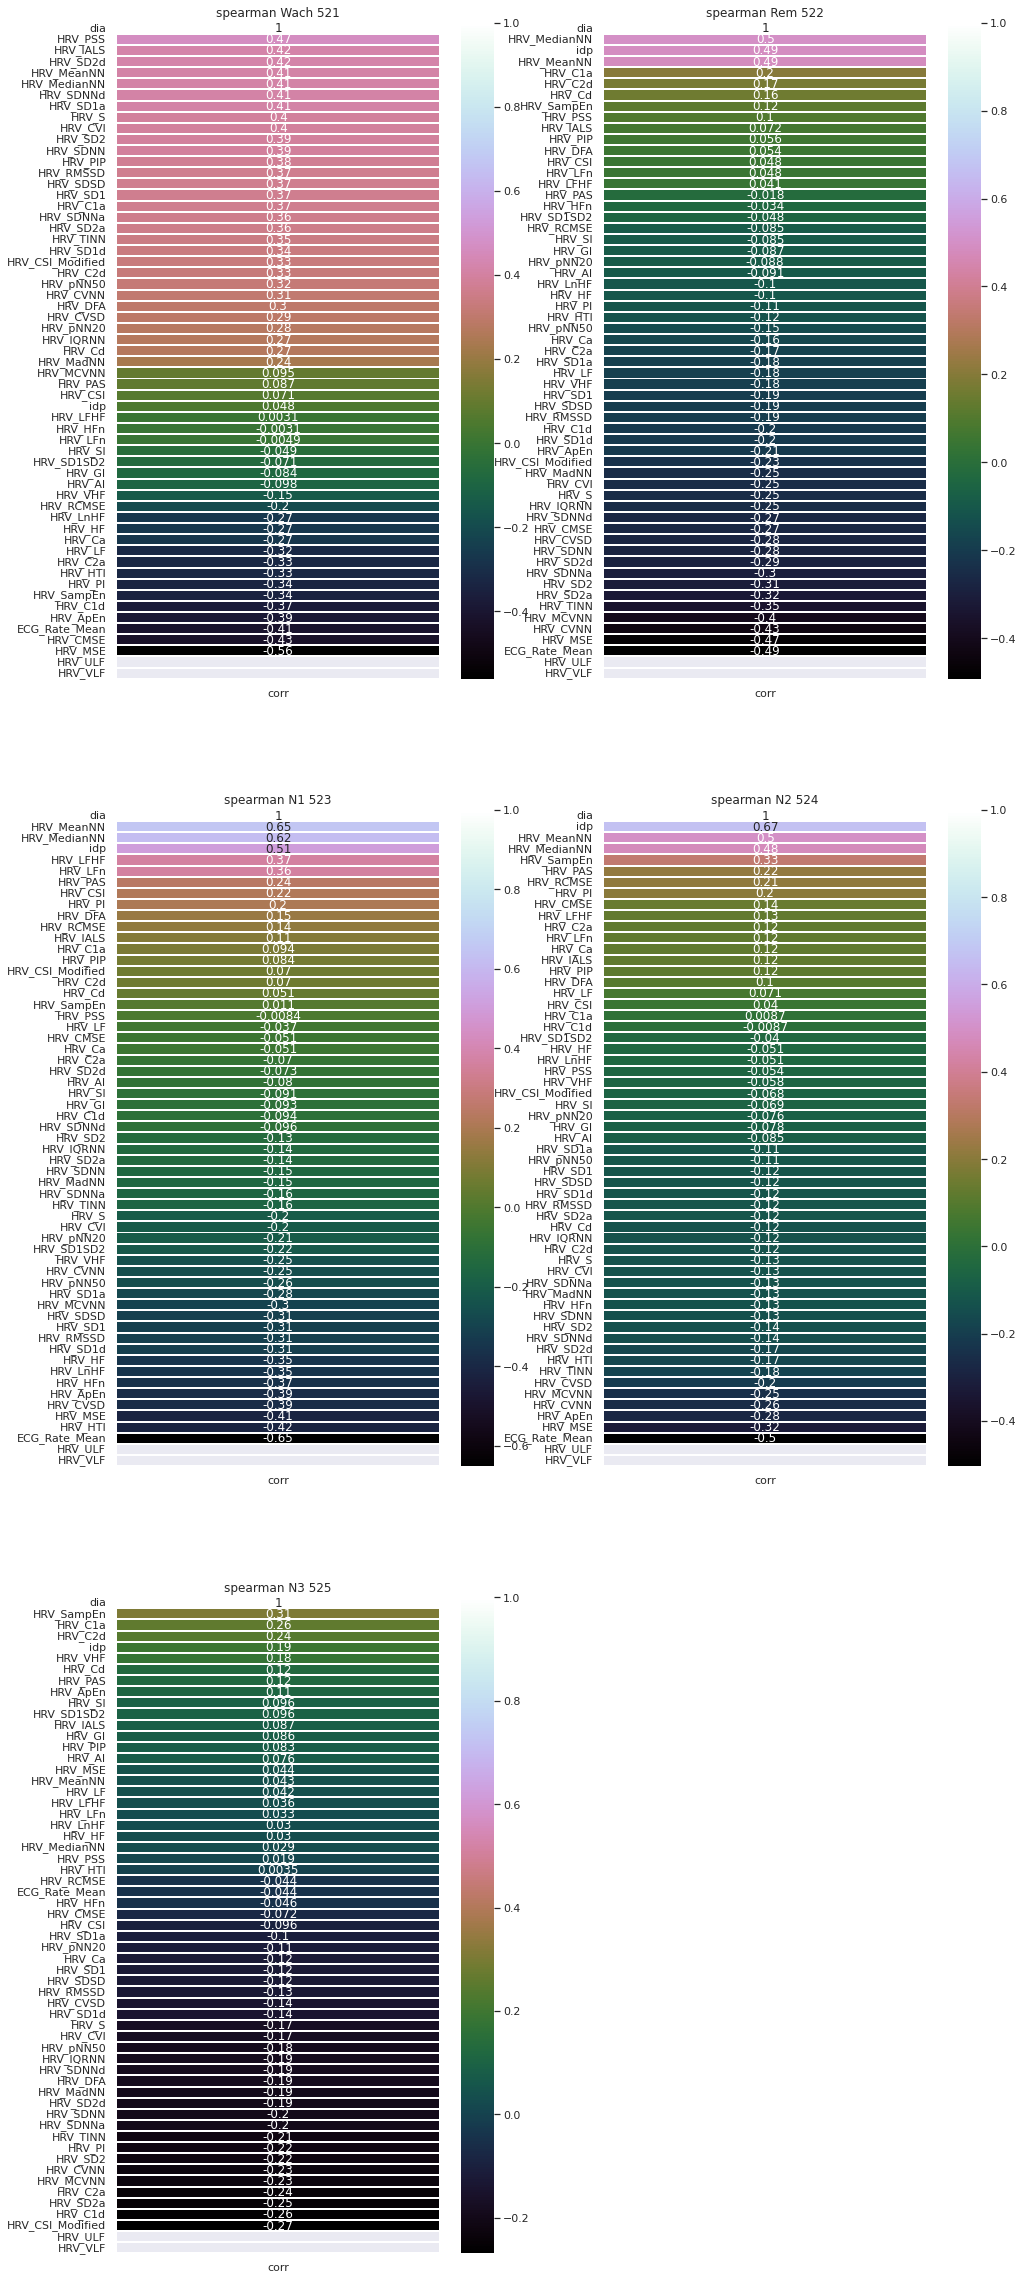

In [7]:
#Erstellen der Heatmaps mit Spearman Korrelation zur Diagnose 
data_stadiums = [wach,rem,n1,n2,n3]
data_names = ['Wach','Rem','N1','N2','N3']

all_corr_spear = stat.plot_corr_all_stadium(data_stadiums,data_names,'spearman')
dfi.export(all_corr_spear,"statistics/spearman_correlations.png")

greatest_corr_s = all_corr_spear.style.applymap(stat.style_negative, props='color:red;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.5) and (v > -0.5) else None)
greatest_corr_s

#corr_styled = all_corr.style.highlight_max() #adding a gradient based on values in cell
dfi.export(greatest_corr_s,"statistics/greatest_spearman_correlations.png")

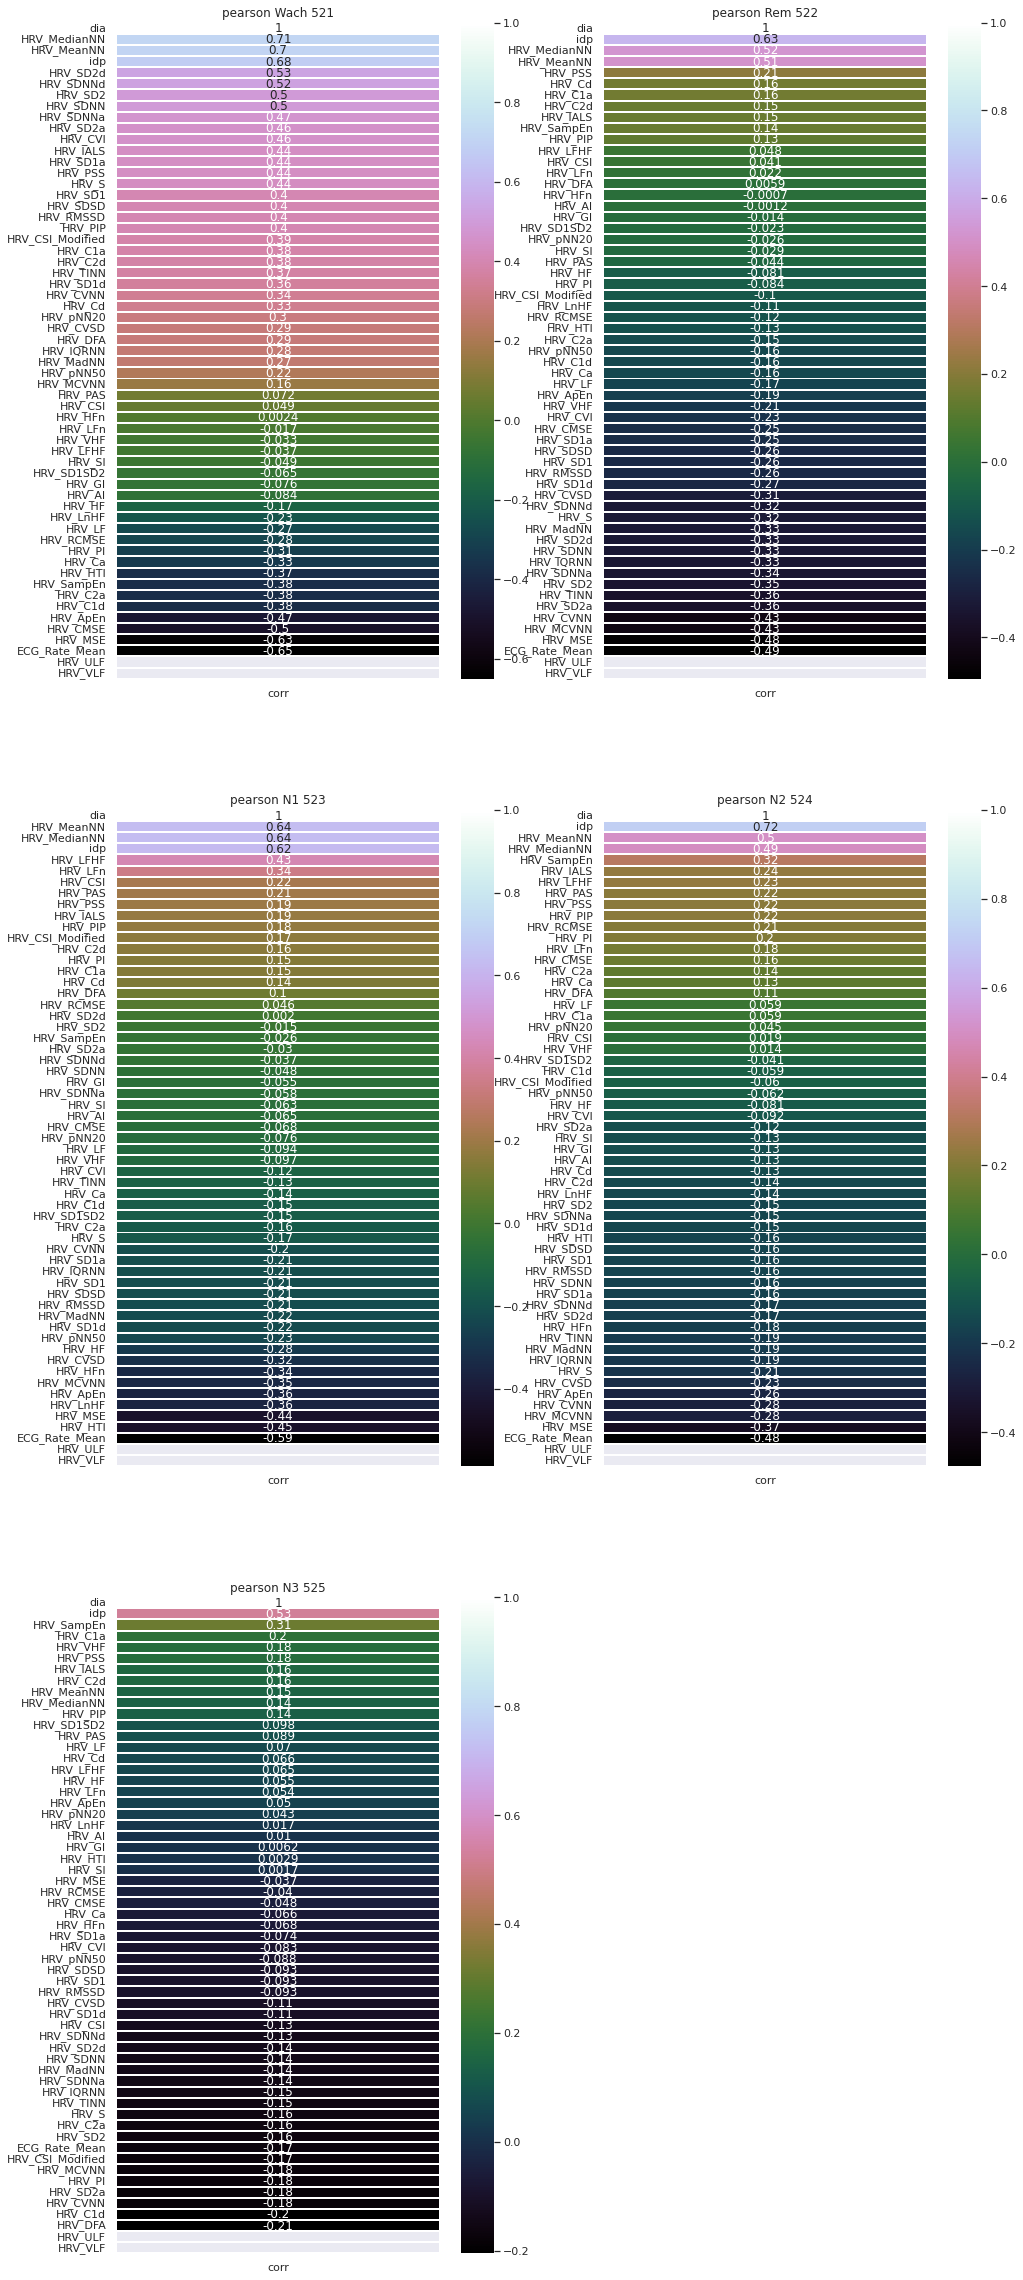

In [8]:
all_corr_pear = stat.plot_corr_all_stadium(data_stadiums,data_names,'pearson')
dfi.export(all_corr_pear,"statistics/pearson_correlations.png")

greatest_corr_p = all_corr_pear.style.applymap(stat.style_negative, props='color:red;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.5) and (v > -0.5) else None)
greatest_corr_p

dfi.export(greatest_corr_p,"statistics/greatest_pearson_correlations.png")

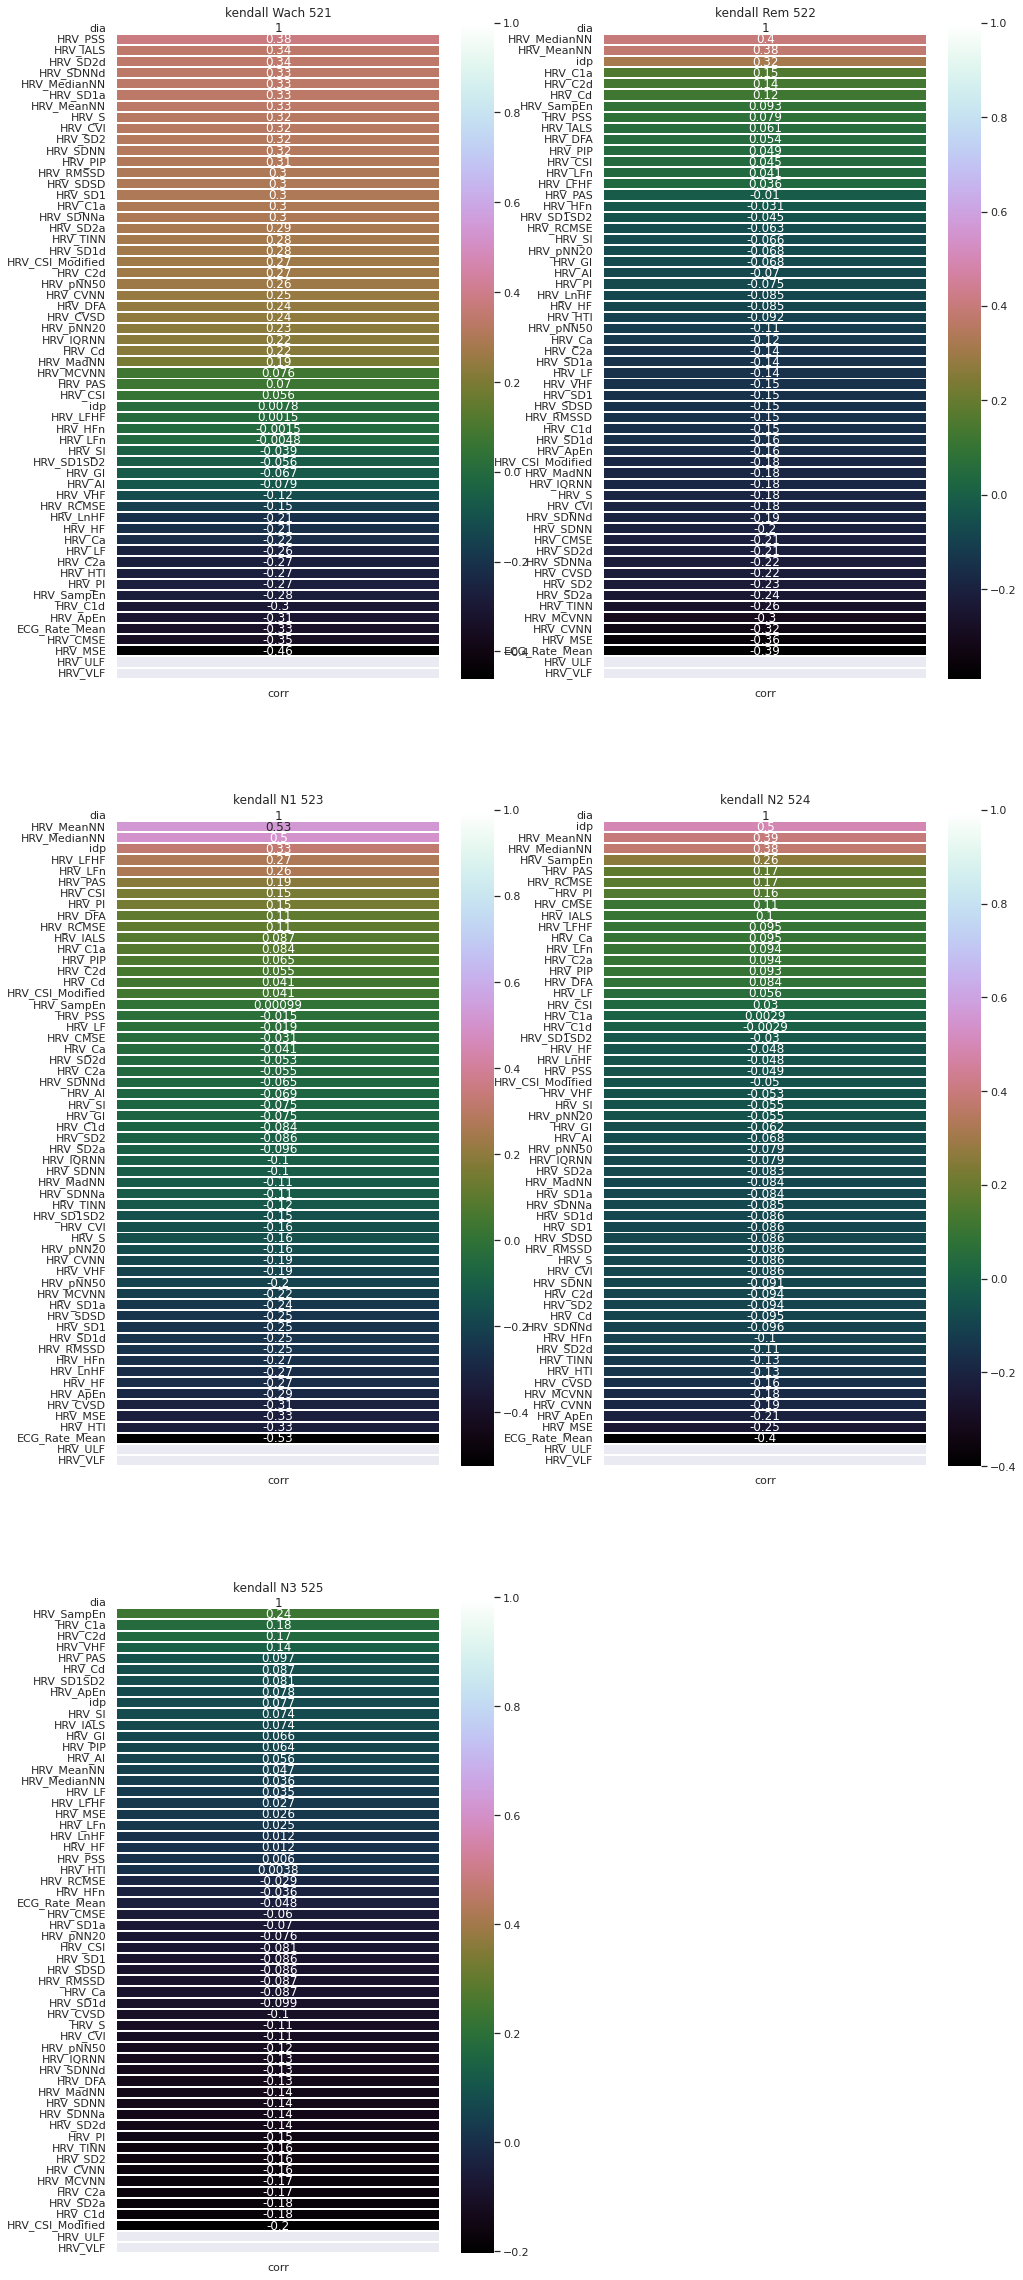

In [9]:
all_corr_kend = stat.plot_corr_all_stadium(data_stadiums,data_names,'kendall')
dfi.export(all_corr_kend,"statistics/kendall_correlations.png")

greatest_corr_k = all_corr_kend.style.applymap(stat.style_negative, props='color:red;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.5) and (v > -0.5) else None)
greatest_corr_k

dfi.export(greatest_corr_k,"statistics/greatest_kendall_correlations.png")

In [10]:
#    def make_all_largest(all_corr):
#
#        large_wach = all_corr.nlargest(5, 'Wach',keep='all')
#        large_rem = all_corr.nlargest(5, 'Rem',keep='all')
#        large_n1 = all_corr.nlargest(5, 'N1',keep='all')
#        large_n2 = all_corr.nlargest(5, 'N2',keep='all')
#        large_n3 = all_corr.nlargest(5, 'N3',keep='all')

#        all_large = pd.DataFrame(data=[large_wach['Wach'],large_rem['Rem'],large_n1['N1'],large_n2['N2'],large_n3['N3']])
                                 #columns=['Wach','Rem', 'N1', 'N2','N3'])
#        all_large = all_large.round(3)
#        all_large = all_large.transpose()

#        return all_large

#kend = make_all_largest(all_corr_kend)
kend = stat.make_all_largest(all_corr_kend).to_csv('statistics/kendall.csv')
pear = stat.make_all_largest(all_corr_pear).to_csv('statistics/pearson.csv')
spear = stat.make_all_largest(all_corr_spear).to_csv('statistics/spearman.csv')

#dfi.export(greatest_corr_k,"statistics/largest_kendall_table.png")

#print(greatest_corr_p)
#print(greatest_corr_s)
print(kend)


None


In [11]:
#    def make_all_smallest(all_corr):
#
#        small_wach = all_corr.nsmallest(5, 'Wach',keep='all')
#        small_rem = all_corr.nsmallest(5, 'Rem',keep='all')
#        small_n1 = all_corr.nsmallest(5, 'N1',keep='all')
#        small_n2 = all_corr.nsmallest(5, 'N2',keep='all')
#        small_n3 = all_corr.nsmallest(5, 'N3',keep='all')
#
#        all_small = pd.DataFrame(data=[small_wach['Wach'],small_rem['Rem'],small_n1['N1'],small_n2['N2'],small_n3['N3']])
#                                 #columns=['Wach','Rem', 'N1', 'N2','N3'])
#        all_small = all_small.round(3)
#        all_small = all_small.transpose()
#
#        return all_small

#kend = make_all_largest(all_corr_kend)
kend_s = stat.make_all_smallest(all_corr_kend).to_csv('statistics/kendall_s.csv')
pear_s = stat.make_all_smallest(all_corr_pear).to_csv('statistics/pearson_s.csv')
spear_s = stat.make_all_smallest(all_corr_spear).to_csv('statistics/spearman_s.csv')

#dfi.export(greatest_corr_k,"statistics/largest_kendall_table.png")

#print(greatest_corr_p)
#print(greatest_corr_s)
print(kend_s)


AttributeError: module 'statistic' has no attribute 'make_all_smallest'

In [12]:
greatest_corr_k


,Wach,Rem,N1,N2,N3
dia,1.000000,1.000000,1.000000,1.000000,1.000000
HRV_PSS,0.379983,0.079333,-0.014909,-0.048528,0.005989
HRV_IALS,0.341810,0.060964,0.087466,0.099802,0.073531
HRV_SD2d,0.338542,-0.206963,-0.052657,-0.112599,-0.139906
HRV_SDNNd,0.334588,-0.191087,-0.064579,-0.095902,-0.130355
HRV_MedianNN,0.333426,0.400106,0.503547,0.381109,0.036142
HRV_SD1a,0.332727,-0.139346,-0.237453,-0.084066,-0.070227
HRV_MeanNN,0.332494,0.384300,0.525575,0.394915,0.046819
HRV_S,0.322493,-0.184708,-0.155984,-0.086497,-0.113287
HRV_CVI,0.322493,-0.184708,-0.155984,-0.086497,-0.113287


In [ ]:
greatest_corr_s


In [70]:
dataset_core = stat.make_df_with_all_results('hrvresults')
dia_to_int = {'NT1': 1, 'NT2': 2, 'IHS': 3}
stadium_to_int = {' Wach': 1,' Rem': 2,' N1': 3,' N2': 4,' N3': 5}

#dataset_core['dia'] = dataset_core['dia'].map(dia_to_int)
#dataset_core['stadium'] = dataset_core['stadium'].map(stadium_to_int)
#ml_daten = dataset_core[['stadium','HRV_MeanNN','HRV_ApEn','HRV_SD2d','HRV_MedianNN','HRV_MSE', 'ECG_Rate_Mean','dia']]

ml_daten = wach[['HRV_MeanNN','HRV_ApEn','HRV_SD2d','HRV_MedianNN','HRV_MSE', 'ECG_Rate_Mean','dia']]
#ml_daten = rem[['HRV_MeanNN','HRV_RMSSD','HRV_LFHF','HRV_ApEn','HRV_SD2d','HRV_MedianNN','HRV_MSE', 'ECG_Rate_Mean','dia']]
ml_daten.reset_index(inplace=True, drop=True)
ml_daten = ml_daten.round(2)
ml_daten = ml_daten.fillna(0)

ml_daten

,HRV_MeanNN,HRV_ApEn,HRV_SD2d,HRV_MedianNN,HRV_MSE,ECG_Rate_Mean,dia
0,736.59,0.82,46.56,742.19,0.71,81.46,2
1,938.59,1.02,82.94,941.41,0.93,63.95,2
2,871.71,0.79,138.60,875.00,0.56,68.84,2
3,632.99,1.18,13.88,635.00,0.89,94.80,1
4,965.34,1.19,157.54,930.00,1.03,62.41,1
...,...,...,...,...,...,...,...
165,736.73,1.05,33.17,740.00,0.98,81.45,1
166,1175.78,0.86,77.01,1195.31,0.42,51.04,3
167,940.08,0.33,184.96,937.50,0.23,63.87,3
168,1088.30,1.04,70.37,1105.47,0.64,55.14,3


Text(0, 0.5, 'Stadium')

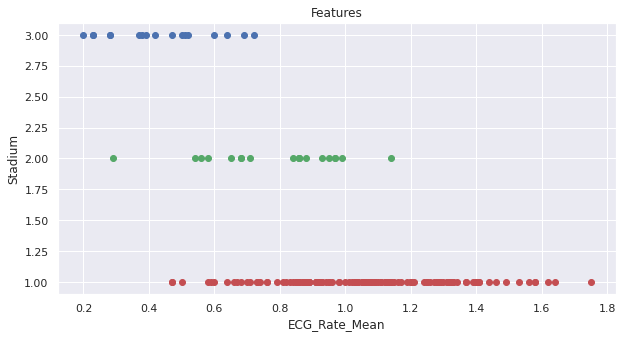

In [71]:

#colors = {'NT1' : 'r', 'NT2' : 'g', 'IHS' : 'b'}
colors = {1 : 'r', 2 : 'g', 3 : 'b'}

fig, ax = plt.subplots(figsize=(10, 5))

#print(ml_daten['dia'][i])

for i in range(len(ml_daten['dia'])):
    ax.scatter(ml_daten['HRV_MSE'][i], ml_daten['dia'][i],
               color=colors[ml_daten['dia'][i]])

ax.set_title('Features')
ax.set_xlabel('ECG_Rate_Mean')
ax.set_ylabel('Stadium')



In [72]:
X = ml_daten.iloc[:,:-1]
y = ml_daten.iloc[:,-1]
print('X:', X.shape,' y:', y.shape)

X: (170, 6)  y: (170,)


In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

print('X_train:', X_train.shape, ' y_train:', y_train.shape)
print('X_test:', X_test.shape, ' y_test:', y_test.shape)

X_train: (136, 6)  y_train: (136,)
X_test: (34, 6)  y_test: (34,)


In [74]:
from sklearn.linear_model import LogisticRegression


#log_clf = LogisticRegression()
log_clf = LogisticRegression(max_iter=1000)

log_clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [75]:
from sklearn.metrics import accuracy_score

accuracy_df = []
for i in range(1,6):
    y_pred = log_clf.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)
    
    accuracy_df.append(acc_score)
    #accuracy_df['1'] = acc_score
acc = pd.DataFrame(accuracy_df, columns=['log_clf'])
all_accuracy = all_accuracy.append(acc)
print(all_accuracy)
#print(acc)
#print('Accuracy:', acc_score)

    log_clf
0  0.823529
1  0.823529
2  0.823529
3  0.823529
4  0.823529


In [76]:
from sklearn.tree import DecisionTreeClassifier

accuracy_df = []
for i in range(1,6):
    tree_clf = DecisionTreeClassifier()

    tree_clf.fit(X_train, y_train)
    
    accuracy_df.append(tree_clf.score(X_test, y_test))
    #accuracy_df['1'] = acc_score
acc = pd.DataFrame(accuracy_df, columns=['DecisionTree'])
all_accuracy = all_accuracy.merge(acc,how='outer', left_index=True, right_index=True)
print(all_accuracy)


print('Accuracy Decision Tree:', tree_clf.score(X_test, y_test))

    log_clf  DecisionTree
0  0.823529      0.794118
1  0.823529      0.823529
2  0.823529      0.823529
3  0.823529      0.823529
4  0.823529      0.823529
Accuracy Decision Tree: 0.8235294117647058


In [77]:
from sklearn.svm import SVC

accuracy_df = []
for i in range(1,6):
    clf = SVC(kernel='linear')
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    accuracy_df.append(accuracy_score(y_test,y_pred))
    #accuracy_df['1'] = acc_score
acc = pd.DataFrame(accuracy_df, columns=['SVM'])
all_accuracy = all_accuracy.merge(acc,how='outer', left_index=True, right_index=True)
print(all_accuracy)

#print('Accuracy SVM:', accuracy_score(y_test,y_pred))

    log_clf  DecisionTree       SVM
0  0.823529      0.794118  0.823529
1  0.823529      0.823529  0.823529
2  0.823529      0.823529  0.823529
3  0.823529      0.823529  0.823529
4  0.823529      0.823529  0.823529


In [27]:
all_mean = all_accuracy.mean()

In [38]:
n1_mean = all_accuracy.mean()

In [48]:
n2_mean = all_accuracy.mean()

In [58]:
n3_mean = all_accuracy.mean()

In [68]:
rem_mean = all_accuracy.mean()

In [78]:
wach_mean = all_accuracy.mean()

In [79]:
means = {'alle':all_mean,'n1':n1_mean, 'n2':n2_mean, 'n3':n3_mean, 'rem':rem_mean,'wach':wach_mean}
means_df = pd.DataFrame(means)
means_df = means_df.round(2)
means_df

,alle,n1,n2,n3,rem,wach
log_clf,0.66,0.80,0.84,0.64,0.84,0.82
DecisionTree,0.68,0.52,0.74,0.83,0.85,0.82
SVM,0.73,0.80,0.87,0.64,0.87,0.82


In [300]:
means = {'alle':all_mean,'n1':n1_mean, 'n2':n2_mean, 'n3':n3_mean, 'rem':rem_mean,'wach':wach_mean}
means_df = pd.DataFrame(means)
means_df = means_df.round(2)
means_df

,alle,n1,n2,n3,rem,wach
log_clf,0.72,0.90,0.89,0.64,0.92,0.82
DecisionTree,0.73,0.66,0.83,0.73,0.93,0.78
SVM,0.77,0.80,0.87,0.61,0.87,0.82


In [69]:
all_accuracy = pd.DataFrame()